In [1]:
import numpy as np 
import sys
import torch
import matplotlib.pyplot as plt
sys.path.append('../src/')
sys.path.append('../data/')

from generalist_class import Generalist
from tqdm import tqdm
from data_process_fns import Convert_fastaToNp


FastaFilePath  = '../data/msa_p53_unimsa.fa' # file path of the fasta file 
data_one_hot = Convert_fastaToNp(filepath = FastaFilePath, binary = True, labels_inc =True)


In [6]:
nA, nS, nP = data_one_hot.shape
k = 32
minlim = -1 ; maxlim = 1
z = (minlim - maxlim)* torch.rand(nS,k) + maxlim ; z = z/torch.linalg.norm(z) 
t = (minlim - maxlim)* torch.rand(nA, k, nP) + maxlim; t = t/torch.linalg.norm(t)

In [ ]:
## initialize random parameters so that they both start at the same point 

In [7]:
model0 = Generalist(data_one_hot, k = 32, z_init = z, t_init = t)
model0.train(optimizer = 'adam')
model1 = Generalist(data_one_hot, k = 32, z_init = z, t_init = t)
model1.train(optimizer = 'yogi')

running on cpu
one hot encoded data of size torch.Size([21, 785, 341])
started inference...
takes 0.15410828590393066 seconds for the first step
inference is over
step on avg takes 0.1178672491695007 seconds 
inference done in 0.8682887355486552 minutes for k = 32, in 442 steps
running on cpu
one hot encoded data of size torch.Size([21, 785, 341])
started inference...
takes 0.10814094543457031 seconds for the first step
inference is over
step on avg takes 0.12046444981262602 seconds 
inference done in 0.9315917452176412 minutes for k = 32, in 464 steps


In [11]:
larr0 = model0.Larr ; larr1 = model1.Larr
larr0 = larr0.numpy() ; larr1 = larr1.numpy()

Text(0, 0.5, 'log likelihood')

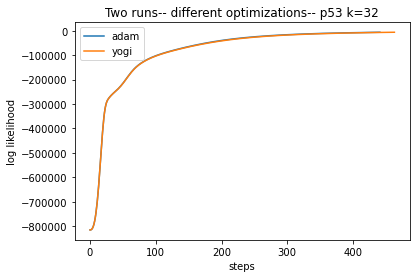

In [12]:

plt.plot(larr0,label =  'adam')
plt.plot(larr1, label = 'yogi')
plt.legend()
plt.title('Two runs-- different optimizations-- p53 k=32')
plt.xlabel('steps')
plt.ylabel('log likelihood')

In [13]:
print(larr0[-1])
print(larr1[-1])

-6396.251
-6387.1675


Text(0, 0.5, 'yogi')

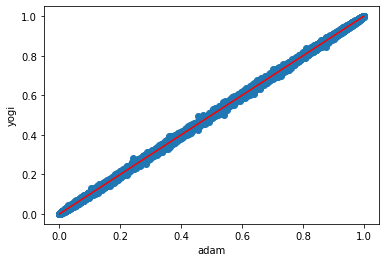

In [14]:
## 
pi_ran= model0.pi
pi_ran = pi_ran.numpy()
pi_svd= model1.pi
pi_svd = pi_svd.numpy()

pi_ran = pi_ran.flatten()
pi_svd = pi_svd.flatten()

plt.scatter(pi_ran, pi_svd)
plt.plot(pi_ran, pi_ran, c = 'r')
plt.xlabel('adam')
plt.ylabel('yogi')
###

In [ ]:
## are the probabilities the same ? 